In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import joblib


In [28]:
df = pd.read_csv("final/pyha_df.csv")
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,SodankylÃ¤ TÃ¤htelÃ¤,2004,1,1,2004-01-01,35.0,-29.6,0.0,0.2
1,SodankylÃ¤ TÃ¤htelÃ¤,2004,1,2,2004-01-02,35.0,-22.0,7.0,-0.2
2,SodankylÃ¤ TÃ¤htelÃ¤,2004,1,3,2004-01-03,35.5,-18.9,7.0,0.3
3,SodankylÃ¤ TÃ¤htelÃ¤,2004,1,4,2004-01-04,39.1,-14.7,8.0,-0.4
4,SodankylÃ¤ TÃ¤htelÃ¤,2004,1,5,2004-01-05,39.8,-15.5,8.0,-1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Observation station           7504 non-null   object 
 1   Year                          7670 non-null   int64  
 2   Month                         7670 non-null   int64  
 3   Day                           7670 non-null   int64  
 4   Date                          7670 non-null   object 
 5   Snow depth mean [cm]          7481 non-null   float64
 6   Average temperature [°C]      7639 non-null   float64
 7   cloud_code                    7642 non-null   float64
 8   Global radiation mean [W/m2]  7613 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 539.4+ KB


In [30]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)
df.head()

,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2],day_of_year
0,2004,1,1,2004-01-01,35.0,-29.6,0.0,0.2,1
1,2004,1,2,2004-01-02,35.0,-22.0,7.0,-0.2,2
2,2004,1,3,2004-01-03,35.5,-18.9,7.0,0.3,3
3,2004,1,4,2004-01-04,39.1,-14.7,8.0,-0.4,4
4,2004,1,5,2004-01-05,39.8,-15.5,8.0,-1.0,5


In [31]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [32]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.6486783778102168
Mean Squared Error: 314.51334420162914


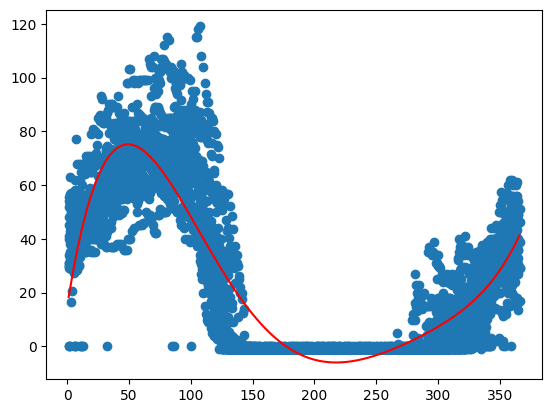

In [37]:
mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 5))

myline = np.linspace(1, 366, 100)

plt.scatter(X_train["day_of_year"], y_train)
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [38]:
snowdept = mymodel(range(7,21))
print(snowdept)

[33.7038943  35.97020933 38.15758181 40.26738406 42.30097471 44.2596987
 46.14488742 47.95785874 49.69991704 51.37235335 52.97644535 54.51345745
 55.98464089 57.39123376]


In [39]:
joblib.dump(model, 'pyha_snow_depth_predictor.pkl')

['pyha_snow_depth_predictor.pkl']